In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn import preprocessing
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB ,BernoulliNB ,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [238]:
df=pd.read_csv("indian_liver_patient.csv" )

In [ ]:
df

In [ ]:
df.isna().sum()

In [169]:
duplicate = df[df.duplicated()]
duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,Female,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289.0,875.0,731.0,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272.0,31.0,61.0,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.00,1
108,36,Male,0.8,0.2,158.0,29.0,39.0,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282.0,72.0,140.0,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332.0,84.0,139.0,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196.0,20.0,35.0,5.8,2.0,0.50,1
164,39,Male,1.9,0.9,180.0,42.0,62.0,7.4,4.3,1.38,1


In [170]:
df_remdup=df.drop_duplicates(keep='first')

In [171]:
df_remdup.shape

(571, 11)

In [226]:
for ind,row in df_remdup.iterrows():
  df_remdup.loc[ind,"Albumin_and_Globulin_Ratio"] = row["Albumin"]/ (row["Total_Protiens"]-row["Albumin"])

In [173]:
df[df.isna().any(axis=1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
9,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1
12,64,Male,0.9,NaN,310.0,61.0,58.0,7.0,3.4,0.90,2
14,61,Male,0.7,0.2,145.0,53.0,NaN,5.8,2.7,0.87,1
29,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,NaN,1.10,2
31,52,Male,0.9,0.2,NaN,35.0,44.0,4.9,2.9,1.40,1
57,48,NaN,0.9,0.2,175.0,24.0,NaN,5.5,2.7,0.90,2
93,60,Male,5.8,2.7,204.0,NaN,400.0,7.0,3.0,0.70,1
105,36,Male,5.3,2.3,145.0,32.0,NaN,5.1,2.6,1.00,2
118,32,Male,15.9,7.0,280.0,1350.0,1600.0,5.6,2.8,NaN,1
209,45,Female,0.9,0.3,189.0,23.0,33.0,6.6,3.9,NaN,1


In [174]:
# df1= df.drop(['Gender'],axis=1)
# df1
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [175]:
df_remdup.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [176]:
correlation=df_remdup.corr(numeric_only=True)
correlation

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011195,0.007666,0.084650,-0.084830,-0.016292,-0.195492,-0.272001,-0.215959,-0.139258
Total_Bilirubin,0.011195,1.000000,0.874099,0.205705,0.220532,0.238462,-0.009284,-0.224380,-0.208948,-0.223057
Direct_Bilirubin,0.007666,0.874099,1.000000,0.234250,0.242447,0.258178,-0.001165,-0.230793,-0.202802,-0.248738
Alkaline_Phosphotase,0.084650,0.205705,0.234250,1.000000,0.128548,0.167176,-0.029558,-0.164817,-0.232431,-0.188363
Alamine_Aminotransferase,-0.084830,0.220532,0.242447,0.128548,1.000000,0.791599,-0.034778,-0.027687,-0.006213,-0.161860
Aspartate_Aminotransferase,-0.016292,0.238462,0.258178,0.167176,0.791599,1.000000,-0.022599,-0.085632,-0.076316,-0.151231
Total_Protiens,-0.195492,-0.009284,-0.001165,-0.029558,-0.034778,-0.022599,1.000000,0.785019,0.234243,0.034132
Albumin,-0.272001,-0.224380,-0.230793,-0.164817,-0.027687,-0.085632,0.785019,1.000000,0.687277,0.164687
Albumin_and_Globulin_Ratio,-0.215959,-0.208948,-0.202802,-0.232431,-0.006213,-0.076316,0.234243,0.687277,1.000000,0.171722
Dataset,-0.139258,-0.223057,-0.248738,-0.188363,-0.161860,-0.151231,0.034132,0.164687,0.171722,1.000000


In [177]:
# df['Gender']=pd.to_numeric(df['Gender'],errors = 'coerce')

In [178]:
# correlation=df.corr()

In [179]:
# correlation

<function matplotlib.pyplot.show(close=None, block=None)>

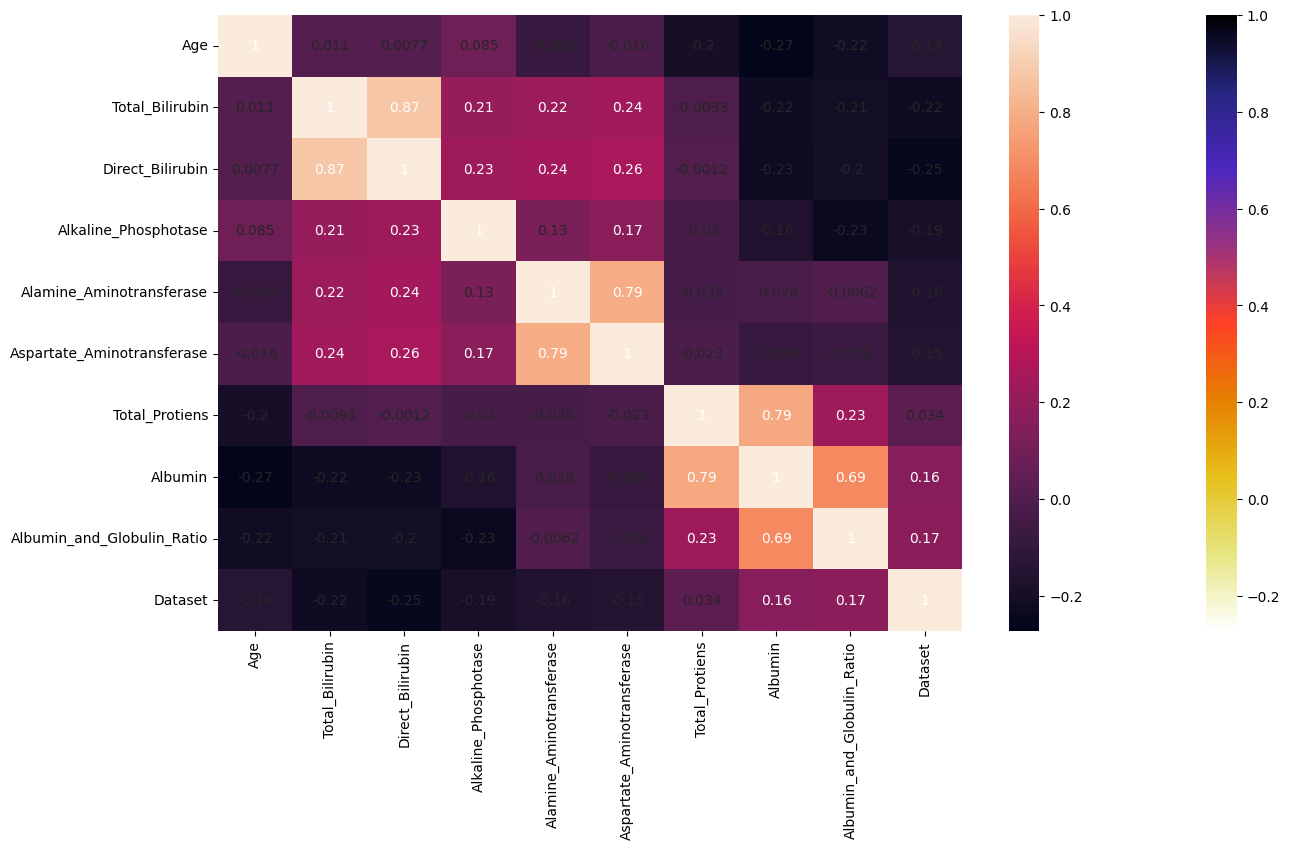

In [180]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap_r)
sns.heatmap(correlation)
plt.show

In [181]:
correlation[correlation.abs() >= 0.5].replace(1, np.nan).nunique()

Age                           0
Total_Bilirubin               1
Direct_Bilirubin              1
Alkaline_Phosphotase          0
Alamine_Aminotransferase      1
Aspartate_Aminotransferase    1
Total_Protiens                1
Albumin                       2
Albumin_and_Globulin_Ratio    1
Dataset                       0
dtype: int64

In [182]:
df_remdup.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,571.000000,571.000000,570.000000,569.000000,569.000000,568.000000,571.000000,570.000000,566.000000,571.000000
mean,44.833625,3.325219,1.501053,291.168717,79.465729,109.598592,6.493870,3.147895,0.948004,1.288967
std,16.232153,6.262987,2.832984,245.150147,181.539570,291.369722,1.088914,0.797142,0.319635,0.453680
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [183]:
print(df_remdup.mean(numeric_only=True))

Age                            44.833625
Total_Bilirubin                 3.325219
Direct_Bilirubin                1.501053
Alkaline_Phosphotase          291.168717
Alamine_Aminotransferase       79.465729
Aspartate_Aminotransferase    109.598592
Total_Protiens                  6.493870
Albumin                         3.147895
Albumin_and_Globulin_Ratio      0.948004
Dataset                         1.288967
dtype: float64


In [234]:
df_gh = df.drop("Gender",axis = 1)

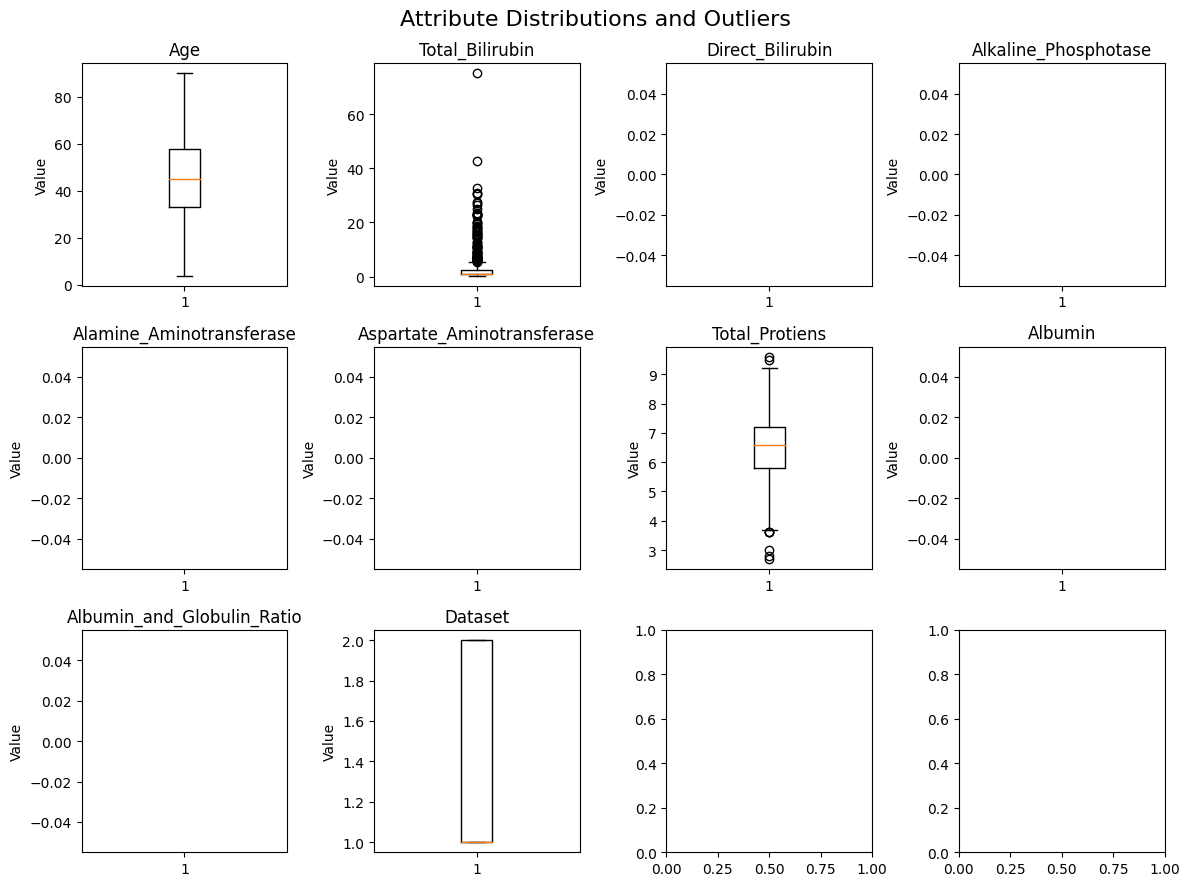

In [242]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Outliers', fontsize=16)
# Iterate over the columns and create box plots
for i, column in enumerate(df_gh.columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(df_gh[column])
    ax.set_title(column)
    ax.set_ylabel('Value')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


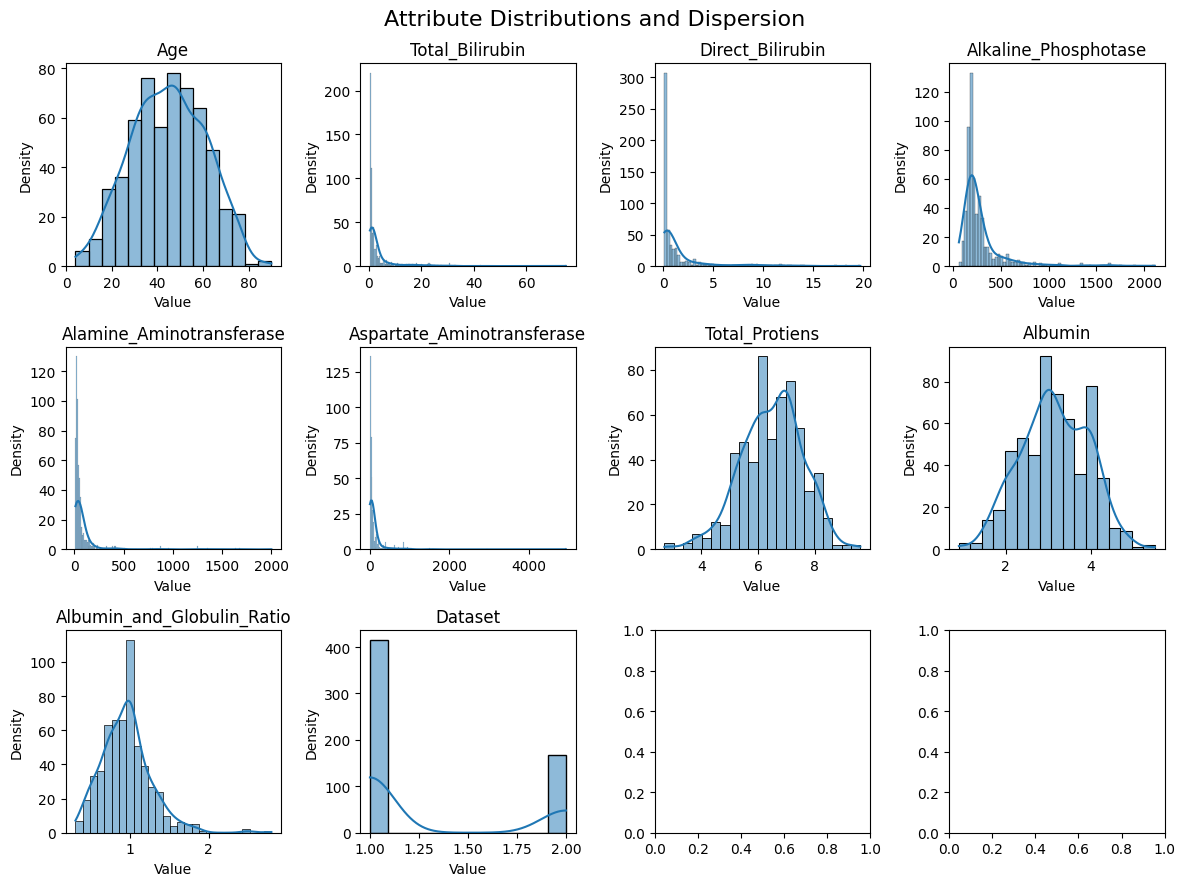

In [236]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Dispersion', fontsize=16)

# Iterate over the columns and create distribution plots
for i, column in enumerate(df_gh.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=df_gh, x=column, kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [241]:
df1=df_remdup[df_remdup.Dataset==1]
df2=df_remdup[df_remdup.Dataset==2]

In [199]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289.0,58.0,80.0,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190.0,28.0,47.0,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1


In [200]:
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
8,17,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
12,64,Male,0.9,NaN,310.0,61.0,58.0,7.0,3.4,0.90,2
15,25,Male,0.6,0.1,183.0,91.0,53.0,5.5,2.3,0.70,2
17,33,Male,1.6,0.5,165.0,15.0,23.0,7.3,3.5,0.92,2
24,63,Male,0.9,0.2,194.0,52.0,45.0,6.0,3.9,1.85,2
...,...,...,...,...,...,...,...,...,...,...,...
551,29,Male,1.2,0.4,160.0,20.0,22.0,6.2,3.0,0.90,2
564,38,Female,0.6,0.1,165.0,22.0,34.0,5.9,2.9,0.90,2
566,50,Female,1.0,0.3,191.0,22.0,31.0,7.8,4.0,1.00,2
578,60,Male,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37,2


In [201]:

# impute= SimpleImputer(missing_values=np.nan ,strategy='median')
# impute=impute.fit(x1[:,3:10])
# x1[:,3:10]=impute.transform(x1[:,3:10])
# impute.fit(x2[:,3:10])
# x2[:,3:10]=impute.transform(x2[:,3:10])

imputer = SimpleImputer(strategy='median', 
                        missing_values=np.nan)
imputer = imputer.fit(df1.iloc[:,3:10])
df1.iloc[:,3:10] = imputer.transform(df1.iloc[:,3:10])
imputer = imputer.fit(df2.iloc[:,3:10])
df2.iloc[:,3:10] = imputer.transform(df2.iloc[:,3:10])

In [202]:
df2.isna().sum()

Age                           0
Gender                        2
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [203]:
df_concat = pd.concat([df1, df2], axis=0)
# x=np.concatenate((X1,X2),axis=0)

In [204]:
df_concat.isna().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [227]:
df_sort=df_concat.sort_values(by="Gender", ascending=True)
df_sort

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.30,0.9,1
1,46,Female,1.4,0.4,298.0,509.0,623.0,3.6,1.00,0.3,1
2,58,Female,0.7,0.1,172.0,27.0,22.0,6.7,3.20,0.9,1
3,44,Female,1.9,0.6,298.0,378.0,602.0,6.6,3.30,1.0,1
4,50,Female,0.7,0.1,192.0,20.0,41.0,7.3,3.30,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...
566,38,Male,1.0,0.3,216.0,21.0,24.0,7.3,4.40,1.5,2
567,34,dsfsf,6.2,3.0,240.0,1680.0,850.0,7.2,4.00,1.2,1
568,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.40,1.0,1
569,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,3.45,1.1,2


In [228]:
df_split1=df_sort.iloc[:-4]
df_sort = df_sort.reset_index(drop=True)


In [229]:
df_split1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,1
1,46,Female,1.4,0.4,298.0,509.0,623.0,3.6,1.0,0.3,1
2,58,Female,0.7,0.1,172.0,27.0,22.0,6.7,3.2,0.9,1
3,44,Female,1.9,0.6,298.0,378.0,602.0,6.6,3.3,1.0,1
4,50,Female,0.7,0.1,192.0,20.0,41.0,7.3,3.3,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...
562,33,Male,1.8,0.8,196.0,25.0,22.0,8.0,4.0,1.0,1
563,30,Male,0.7,0.2,262.0,15.0,18.0,9.6,4.7,1.2,1
564,21,Male,18.5,9.5,380.0,390.0,500.0,8.2,4.1,1.0,1
565,37,Male,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.0,1


In [230]:
df_split2=df_sort.tail(4)
df_split2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
567,34,dsfsf,6.2,3.0,240.0,1680.0,850.0,7.2,4.00,1.2,1
568,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.40,1.0,1
569,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,3.45,1.1,2
570,48,NaN,0.9,0.2,175.0,24.0,29.0,5.5,2.70,0.9,2


In [210]:
df_split2.isna().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [250]:
categorical_cols = ["Gender"]

In [254]:
le = LabelEncoder()
for col in categorical_cols:
    # Taking a column from dataframe, encoding it and replacing same column in the dataframe.
    df_split1[col] = le.fit_transform(df_split1[col])

C:\Users\Kundan\AppData\Local\Temp\ipykernel_18032\3486901415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split1[col] = le.fit_transform(df_split1[col])


In [249]:
### Encoding by Label Encoding 
num = preprocessing.LabelEncoder()
df_split1[ 'Gender' ]= num.fit_transform(df_split1[ 'Gender' ]) 
df_split1

C:\Users\Kundan\AppData\Local\Temp\ipykernel_18032\1566797591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split1[ 'Gender' ]= num.fit_transform(df_split1[ 'Gender' ])


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,1
1,46,0,1.4,0.4,298.0,509.0,623.0,3.6,1.0,0.3,1
2,58,0,0.7,0.1,172.0,27.0,22.0,6.7,3.2,0.9,1
3,44,0,1.9,0.6,298.0,378.0,602.0,6.6,3.3,1.0,1
4,50,0,0.7,0.1,192.0,20.0,41.0,7.3,3.3,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...
562,33,1,1.8,0.8,196.0,25.0,22.0,8.0,4.0,1.0,1
563,30,1,0.7,0.2,262.0,15.0,18.0,9.6,4.7,1.2,1
564,21,1,18.5,9.5,380.0,390.0,500.0,8.2,4.1,1.0,1
565,37,1,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.0,1


In [243]:
df_train=df_split1.drop(['Gender'], axis=1)
df_test=df_split1['Gender']

In [244]:
df_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,1
1,46,1.4,0.4,298.0,509.0,623.0,3.6,1.0,0.3,1
2,58,0.7,0.1,172.0,27.0,22.0,6.7,3.2,0.9,1
3,44,1.9,0.6,298.0,378.0,602.0,6.6,3.3,1.0,1
4,50,0.7,0.1,192.0,20.0,41.0,7.3,3.3,0.8,1
...,...,...,...,...,...,...,...,...,...,...
562,33,1.8,0.8,196.0,25.0,22.0,8.0,4.0,1.0,1
563,30,0.7,0.2,262.0,15.0,18.0,9.6,4.7,1.2,1
564,21,18.5,9.5,380.0,390.0,500.0,8.2,4.1,1.0,1
565,37,0.7,0.2,235.0,96.0,54.0,9.5,4.9,1.0,1


In [245]:
df_test

0      Female
1      Female
2      Female
3      Female
4      Female
        ...  
562      Male
563      Male
564      Male
565      Male
566      Male
Name: Gender, Length: 567, dtype: object

In [248]:
df_train.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [215]:
# train_labels = df_train.Gender
# test_labels = df_test.Gender

In [216]:
x_train,x_test,y_train,y_test=train_test_split(df_train,df_test ,test_size=0.5,random_state=5)

In [217]:
Bernoullis = BernoulliNB()
Bernoullis.fit(x_train, y_train)

Gaussian = GaussianNB()
Gaussian.fit(x_train, y_train)

Multinomial = MultinomialNB()
Multinomial.fit(x_train, y_train)

MultinomialNB()

In [218]:
predictions = Bernoullis.predict(x_test)
predictions1 = Gaussian.predict(x_test)
predictions2 = Multinomial.predict(x_test)

In [224]:
print('predictions BernoulliNB:', accuracy_score(predictions,y_test))
print('predictions GaussianNB:', accuracy_score(predictions2,y_test))
print('predictions MultinomialNB:', accuracy_score(predictions3,y_test))

predictions BernoulliNB: 0.7746478873239436
predictions GaussianNB: 0.45774647887323944
predictions MultinomialNB: 0.45774647887323944


In [225]:
# Bernoullis = BernoulliNB()
# Bernoullis.fit(x_train, y_train)

In [219]:
# predictions = clf.predict(x_test)

In [220]:
# clf = GaussianNB()
# clf.fit(x_train, y_train)

In [221]:
# predictions2 = clf.predict(x_test)

In [222]:
# clf = MultinomialNB()
# clf.fit(x_train, y_train)

In [223]:
# predictions3 = clf.predict(x_test)